In [23]:
module Vector2Ds

    export Vector2D, xdot, sin, cos
    using LinearAlgebra # - чтобы стали доступными фунции dot (скалярное произведение), norm (длина вектора)

    Vector2D{T<:Real} = Tuple{T,T}

    Base. cos(a::Vector2D, b::Vector2D) = dot(a,b)/norm(a)/norm(b)
    xdot(a::Vector2D, b::Vector2D) = a[1]*b[2]-a[2]*b[1]
                # xdot(a,b)=|a||b|sin(a,b) - косое произведение
    Base. sin(a::Vector2D, b::Vector2D) = xdot(a,b)/norm(a)/norm(b)

    """
        randpoints(random::Function, num::Integer)

    - random - функция, возвращающая случайное значение с требуемым рампределением
    - возвращает одномерный массив длины num случайных точек плоскости 
    """
    randpoints(random::Function, num::Integer) = [(random(),random()) for _ in 1:num]
end

Main.Vector2Ds

Задача 1

In [2]:
"""
        randpoints(random::Function, num::Integer)

- random - функция, возвращающая случайное значение с требуемым рампределением
- возвращает одномерный массив длины num случайных точек плоскости 
"""
randpoints(random::Function, num::Integer) = [(random(),random()) for _ in 1:num]



randpoints

In [3]:
points = randpoints(randn, 5)

5-element Vector{Tuple{Float64, Float64}}:
 (0.5717407608341167, -0.32917770996666845)
 (-0.14434138925543374, -1.5466118858320757)
 (-0.2554984047354913, 0.39922209383127194)
 (0.33077551919824766, 0.31875128845923345)
 (0.7486114467603345, -0.4577954794515688)

Задача 2

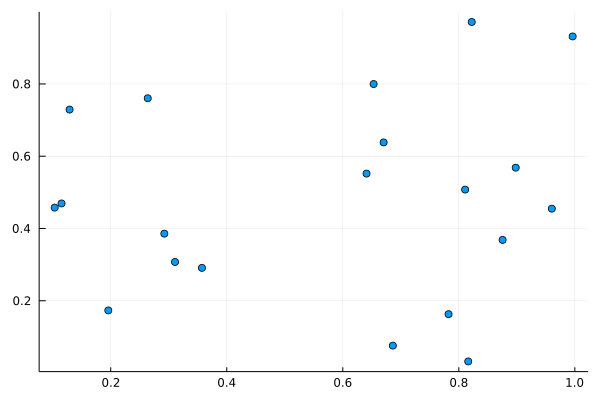


(process:61884): GLib-GIO-WARNING **: 20:08:56.135: Unexpectedly, UWP app `613EBCEA.PolarrPhotoEditorAcademicEdition_5.10.200.0_x64__jb41c8remg0x2' (AUMId `613EBCEA.PolarrPhotoEditorAcademicEdition_jb41c8remg0x2!Polarr') supports 43 extensions but has no verbs


In [4]:
using Plots
points = randpoints(rand, 20)
scatter(points; legend = false) 

In [5]:
typeof(points)

Vector{Tuple{Float64, Float64}} (alias for Array{Tuple{Float64, Float64}, 1})

Задача 3

In [6]:
using Plots
function plotsegments(segments::Vector{Tuple{Float64,Float64}}; kwargs...)
    p=plot(;kwargs...)
    for s in segments
        plot!(collect(s); kwargs...)
    end
    return p
end

plotsegments (generic function with 1 method)

In [7]:
seg=[s for s in zip([1.0,2.0,3.0],[10.0,20.0,30.0])]

3-element Vector{Tuple{Float64, Float64}}:
 (1.0, 10.0)
 (2.0, 20.0)
 (3.0, 30.0)

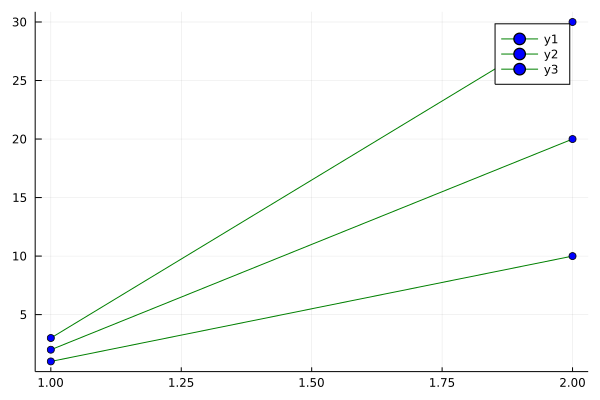

In [8]:
plotsegments(seg; linecolor=:green, markershape=:circle, markercolor=:blue)

Задача 4

In [9]:
using .Vector2Ds
Point=Vector2D
Segment{T<:Real} = Tuple{Point{T},Point{T}}

function intersect((A₁,B₁)::Segment, (A₂,B₂)::Segment)    
    A = [B₁[2]-A₁[2]  A₁[1]-B₁[1]
         B₂[2]-A₂[2]  A₂[1]-B₂[1]]

    b = [A₁[2]*(A₁[1]-B₁[1])+A₁[1]*(B₁[2]-A₁[2])
         A₂[2]*(A₂[1]-B₂[1])+A₂[1]*(B₂[2]-A₂[2])]

    x,y = A\b

    if isinner((x, y), (A₁,B₁))==false || isinner((x, y), (A₂,B₂))==false
        return nothing
    end

    return (x,y)
end

isinner(P::Point, (A,B)::Segment) = 
    (A[1] <= P[1] <= B[1] || A[1] >= P[1] >= B[1]) &&
    (A[2] <= P[2] <= B[2] || A[2] >= P[2] >= B[2])

isinner (generic function with 1 method)

In [10]:
seg=[s for s in zip([0.0,6.0,0.0,6.0],[0.0,6.0,6.0,0.0])]

4-element Vector{Tuple{Float64, Float64}}:
 (0.0, 0.0)
 (6.0, 6.0)
 (0.0, 6.0)
 (6.0, 0.0)

In [11]:
using Plots
function otr_points(seg; kwargs...)
    p=plot(;kwargs...)
    i=1
    otr=[]
    while i<length(seg)
        push!(otr,[seg[i],seg[i+1]])
        i=i+2 
    end
    ss=[]
    for i in 1:length(otr)
        for j in i:length(otr)
            if i!=j
                push!(ss,intersect((otr[i][1],otr[i][2]),(otr[j][1],otr[j][2])))
            end
        end
    end
    for i in otr
       plot!([i[1][1],i[2][1]],[i[1][2],i[2][2]]; kwargs...) 
    end
    for i in ss
        scatter!(i;legend=false,markercolor=:red)
    end
    return p
end

otr_points (generic function with 1 method)

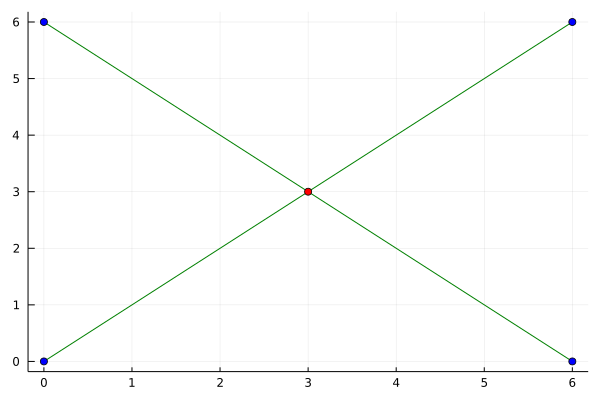

In [12]:
otr_points(seg; linecolor=:green, markershape=:circle, markercolor=:blue)

Задача 5

In [13]:
seg=[s for s in zip([0.0,6.0,0.0,6.0],[0.0,6.0,6.0,0.0])]

4-element Vector{Tuple{Float64, Float64}}:
 (0.0, 0.0)
 (6.0, 6.0)
 (0.0, 6.0)
 (6.0, 0.0)

In [14]:
otr=[(1,-1),(5,7)]

2-element Vector{Tuple{Int64, Int64}}:
 (1, -1)
 (5, 7)

In [15]:
using Plots
function where_points(seg,otr)
    p=plot()
    a=otr[1][2]-otr[2][2]
    b=otr[2][1]-otr[1][1]
    c=otr[1][1]*otr[2][2]-otr[1][2]*otr[2][1]
    #Ax+By+C=0
    a1=[]
    a2=[]
    a3=[]
    for i in seg
        k=a*i[1]+b*i[2]+c
        if k>0
            push!(a1,i)
        elseif k==0
            push!(a2,i)
        else
            push!(a3,i)
        end
    end
    plot!([otr[1][1],otr[2][1]],[otr[1][2],otr[2][2]]; linecolor=:green, markershape=:circle, markercolor=:blue)
    for i in a1
        scatter!(i;legend=false,markercolor=:red)
    end
    for i in a2
        scatter!(i;legend=false,markercolor=:orange)
    end
    for i in a3
        scatter!(i;legend=false,markercolor=:yellow)
    end
    return p
end

where_points (generic function with 1 method)

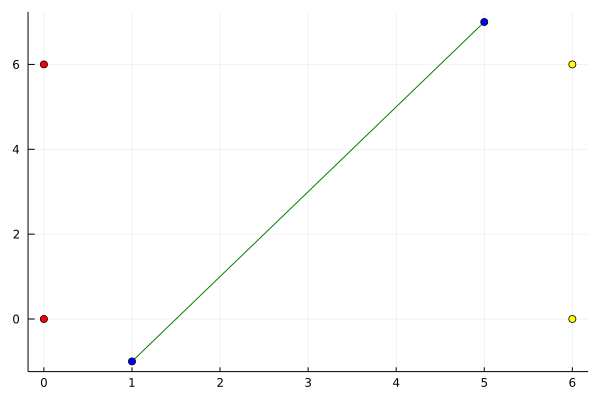

In [16]:
where_points(seg,otr)

Задача 6

In [90]:
points=[s for s in zip([0.0,3.0,6.0,2.0,6.0],[0.0,6.0,4.0,3.0,0.0])]

5-element Vector{Tuple{Float64, Float64}}:
 (0.0, 0.0)
 (3.0, 6.0)
 (6.0, 4.0)
 (2.0, 3.0)
 (6.0, 0.0)

In [91]:
mnog=[s for s in zip([1.0,0.0,3.0,5.0,4.0,2.0,1.0],[0.0,2.0,7.0,2.0,-3.0,1.0,0.0])]

7-element Vector{Tuple{Float64, Float64}}:
 (1.0, 0.0)
 (0.0, 2.0)
 (3.0, 7.0)
 (5.0, 2.0)
 (4.0, -3.0)
 (2.0, 1.0)
 (1.0, 0.0)

In [136]:
using Plots
function in_mnog(points,mnog)
    pairs=[]
    u=1
    while u<length(mnog)
        push!(pairs,[mnog[u],mnog[u+1]])
        u=u+1
    end
    ins=[]
    out=[]
    for p in points
        ugol=0
        for i in pairs
            vec1=(p[1]-i[1][1],p[2]-i[1][2])
            vec2=(p[1]-i[2][1],p[2]-i[2][2])
            ugol=ugol+acos(cos(vec1,vec2))*180/pi
        end
        if round(ugol)>=359
            push!(ins,p)
        else
            push!(out,p)
        end
    end
    p=plot()
    for x in out
        scatter!(x;legend=false,markercolor=:blue)
    end
    for x in ins
        scatter!(x;legend=false,markercolor=:red)
    end
    plot!(mnog)
    return p
end

in_mnog (generic function with 1 method)

In [147]:
pairs

6-element Vector{Vector{Tuple{Float64, Float64}}}:
 [(2.0, 1.0), (1.0, 0.0), (0.0, 2.0)]
 [(1.0, 0.0), (0.0, 2.0), (3.0, 7.0)]
 [(0.0, 2.0), (3.0, 7.0), (5.0, 2.0)]
 [(3.0, 7.0), (5.0, 2.0), (4.0, -3.0)]
 [(5.0, 2.0), (4.0, -3.0), (2.0, 1.0)]
 [(4.0, -3.0), (2.0, 1.0), (1.0, 0.0)]

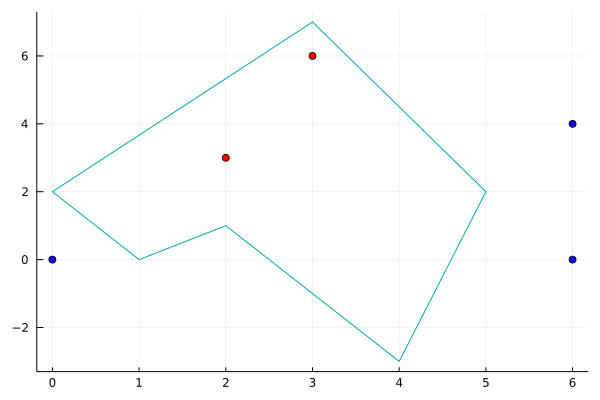

In [137]:
in_mnog(points,mnog)

Задача 7

In [153]:
function is_norm(mnog)
    pairs=[[mnog[length(mnog)-1],mnog[1],mnog[2]]]
    u=1
    while u<length(mnog)-1
        push!(pairs,[mnog[u],mnog[u+1],mnog[u+2]])
        u=u+1
    end
    for x in pairs
        vec1=(x[2][1]-x[1][1],x[2][2]-x[1][2])
        vec2=(x[2][1]-x[3][1],x[2][2]-x[3][2])
        ugol=asin(sin(vec1,vec2))*180/pi
        res=true
        if round(ugol)>180 || ugol<=0
            return false
        end
    end
    return true
end

is_norm (generic function with 1 method)

In [162]:
mnog=[s for s in zip([1.0,0.0,3.0,5.0,4.0,2.0,1.0],[0.0,2.0,7.0,2.0,-3.0,1.0,0.0])]
is_norm(mnog)

false

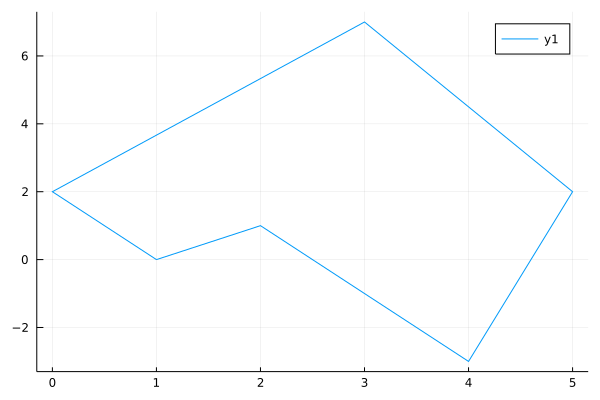

In [163]:
using Plots
p=plot()
plot!(mnog)

In [164]:
mnog=[s for s in zip([0.0,0.0,6.0,6.0,0.0],[0.0,6.0,6.0,0.0,0.0])]
is_norm(mnog)

true

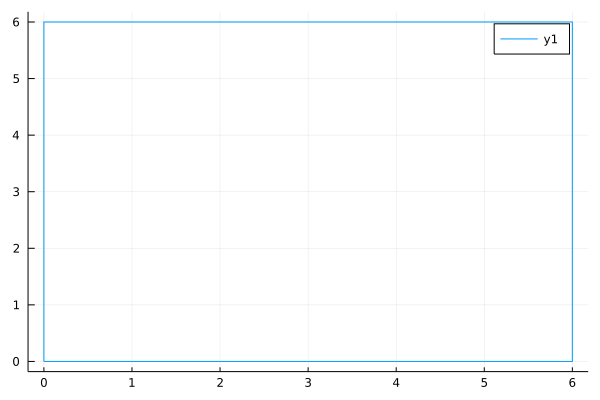

In [165]:
using Plots
p=plot()
plot!(mnog)